# __Plan for project__

1 - Introduction of the purpose of the project. What questions will be answered by the project. 

1.1 - Explain the dataset, what it is we are looking at. Windspeeds ? at dublin airport, why should we know this. what will knowing this do for us. What questions can we answer.

1.2 - Link the source of the dataset csv file

# Introduction 

For the purpose of this project, the following questions will be explored:

What are typical wind conditions at Irish airports?


Airports:

Dublin (DUB)

Shannon (SNN)

Cork (ORK)

Knock (NOC)


2 - Data cleaning and exploration

3 - Data Visualisation. Use Skicit Learn and make them pretty. Use maybe seaborn as well.

4 - Analysis. Give meaningfull insights but keep it short. No fluffy writing. 

5 - Give an overall Summary of the Analysis.

Last - update ReadMe.md to be easy to read. Refer to last years for environment set up. 

Extra - figure out way to Use database? 

NOTE: Ref as you go 

Import libraries 

In [559]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Maybe use these later
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA

In [560]:
# Load datasets.

df = pd.read_csv("dly532.csv")

In [561]:
# Check.

df.head(15)

,Station Name: DUBLIN AIRPORT,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Station Height: 71 M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Latitude:53.428,Longitude: -6.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,date: - 00 to 00 utc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,rain: - Precipitation Amount (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,maxtp: - Maximum Air Temperature (C)\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,mintp: - Minimum Air Temperature (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,gmin: - 09utc Grass Minimum Temperature (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,soil: - Mean 10cm Soil Temperature (C),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [562]:
# clean data and load again in df.
df=pd.read_csv("dly532.csv", skiprows=25, parse_dates=['date'], dayfirst=True, low_memory=False)

# check
df.head(5)

C:\Users\laura\AppData\Local\Temp\ipykernel_3028\2831636099.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("dly532.csv", skiprows=25, parse_dates=['date'], dayfirst=True, low_memory=False)


,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,2042-01-01,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,2042-01-02,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,2042-01-03,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,2042-01-04,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,2042-01-05,0,3.5,1,-0.8,0,0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,


An issue has arised here - we have 1942 dates being passed in as 2042. We need to fix this. 


https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year

In [563]:
# Robust handling whether 'date' is a column or already the index

# using if, else statements 

if 'date' in df.columns:
	# parse column to datetime
	df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y', errors='coerce')
	# fix century issues
	mask = df['date'].dt.year > 2025
	if mask.any():
		df.loc[mask, 'date'] = df.loc[mask, 'date'] - pd.DateOffset(years=100)
	# drop rows with invalid parsed dates
	df = df.dropna(subset=['date'])
	# set as index
	df.set_index('date', inplace=True)
else:
	# operate on index (might be string or already datetime)
	if not pd.api.types.is_datetime64_any_dtype(df.index):
		# try parsing index to datetime
		parsed = pd.to_datetime(df.index, format='%d-%b-%y', errors='coerce')
		# fallback to generic parse if all NaT
		if parsed.isna().all():
			parsed = pd.to_datetime(df.index, errors='coerce')
		df.index = parsed
	# drop rows with invalid index (NaT)
	df = df[~df.index.isna()]
	# fix century issues on index
	if isinstance(df.index, pd.DatetimeIndex):
		idx_series = df.index.to_series()
		mask = idx_series.dt.year > 2025
		if mask.any():
			idx_series.loc[mask] = idx_series.loc[mask] - pd.DateOffset(years=100)
			df.index = pd.DatetimeIndex(idx_series)

# Final check
print(df.head())
print(df.index.min(), df.index.max())


            ind  maxtp  ind.1  mintp  igmin gmin  ind.2  rain     cbl  wdsp  \
date                                                                          
1942-01-01    0    9.7      0    6.8      0  4.7      2   0.0  1020.3  17.2   
1942-01-02    0    9.9      0    7.9      0  6.7      0   0.1  1016.2  15.2   
1942-01-03    0   11.2      0    8.9      0  7.2      0   1.5  1006.8  14.0   
1942-01-04    0    9.2      0    2.7      0  3.4      0   3.5  1001.5  17.0   
1942-01-05    0    3.5      1   -0.8      0    0      0   0.6  1013.4  13.0   

            ...  hg  sun  dos g_rad  soil   pe  evap smd_wd smd_md smd_pd  
date        ...                                                            
1942-01-01  ...      0.0    0              1.1   1.4                       
1942-01-02  ...      0.0    0              0.7   0.9                       
1942-01-03  ...      0.1    0              0.5   0.6                       
1942-01-04  ...      0.6    0              0.6   0.7              

In [564]:
# inspect the data.

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30650 entries, 1942-01-01 to 2025-11-30
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ind     30650 non-null  int64  
 1   maxtp   30650 non-null  float64
 2   ind.1   30650 non-null  int64  
 3   mintp   30650 non-null  float64
 4   igmin   30650 non-null  int64  
 5   gmin    30650 non-null  object 
 6   ind.2   30650 non-null  int64  
 7   rain    30650 non-null  float64
 8   cbl     30650 non-null  float64
 9   wdsp    30650 non-null  float64
 10  ind.3   30650 non-null  int64  
 11  hm      30650 non-null  object 
 12  ind.4   30650 non-null  int64  
 13  ddhm    30650 non-null  object 
 14  ind.5   30650 non-null  int64  
 15  hg      30650 non-null  object 
 16  sun     30650 non-null  float64
 17  dos     30650 non-null  object 
 18  g_rad   30650 non-null  object 
 19  soil    30650 non-null  object 
 20  pe      30650 non-null  float64
 21  evap    30650 non-

In [565]:
# use less columns, only date and windspeed, and rain

df = df[['wdsp', 'rain']]
df.head(5)


,wdsp,rain
date,,
1942-01-01,17.2,0.0
1942-01-02,15.2,0.1
1942-01-03,14.0,1.5
1942-01-04,17.0,3.5
1942-01-05,13.0,0.6


In [566]:
# inspect data statistics.

df.describe()

,wdsp,rain
count,30650.000000,30650.000000
mean,10.171263,2.074085
std,4.585331,4.393867
min,0.000000,0.000000
25%,6.800000,0.000000
50%,9.500000,0.200000
75%,13.000000,2.200000
max,35.500000,92.600000


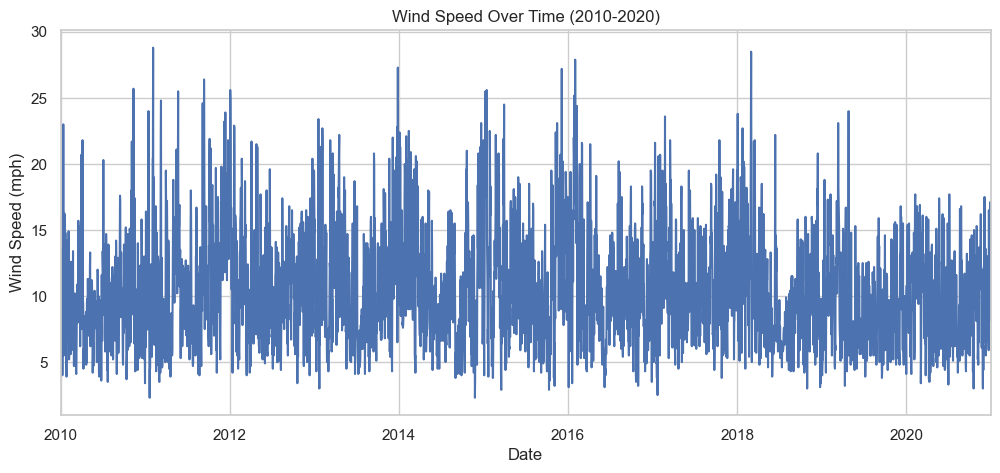

In [567]:
# plot filtered years of wind speed data. Looking at 10 years from 2010 to 2020.
plt.figure(figsize=(12,5))
df['wdsp'].loc['2010':'2020'].plot()
plt.title('Wind Speed Over Time (2010-2020)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()

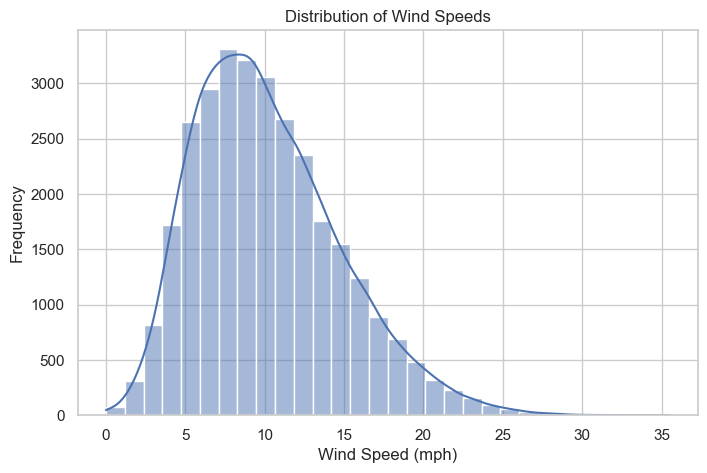

In [568]:
# Histogram of wind speeds ( 'wdsp' column).

plt.figure(figsize=(8,5))
sns.histplot(df['wdsp'], bins=30, kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

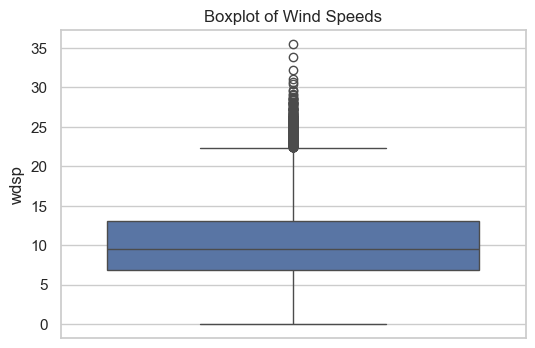

In [569]:
# Boxplot to detect outliers.
plt.figure(figsize=(6,4))
sns.boxplot(y=df['wdsp'])
plt.title('Boxplot of Wind Speeds')
plt.show()


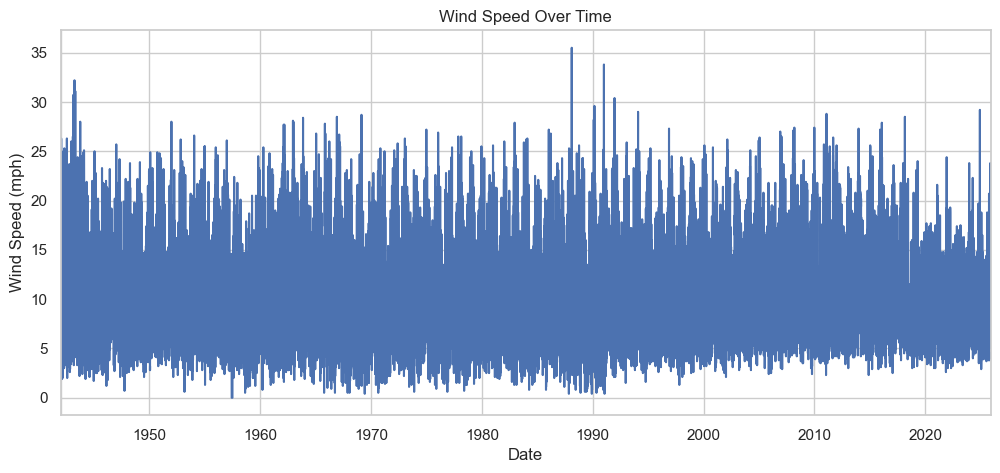

In [570]:
#  Raw wind speed time series.
plt.figure(figsize=(12,5))
df['wdsp'].plot()
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()

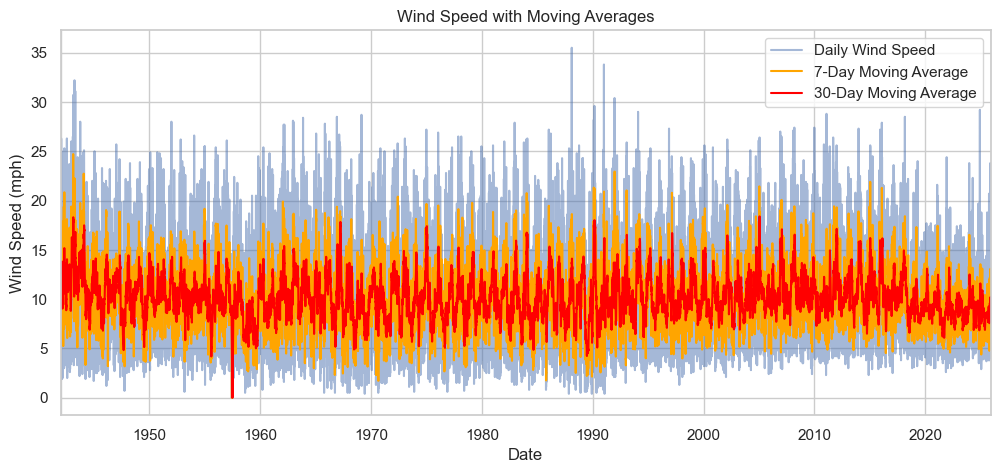

In [571]:
# b) Rolling averages (7-day and 30-day).
df['7d_avg'] = df['wdsp'].rolling(window=7).mean()
df['30d_avg'] = df['wdsp'].rolling(window=30).mean()
plt.figure(figsize=(12,5))
df['wdsp'].plot(label='Daily Wind Speed', alpha=0.5)
df['7d_avg'].plot(label='7-Day Moving Average', color='orange')
df['30d_avg'].plot(label='30-Day Moving Average', color='red')
plt.title('Wind Speed with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()

Start of analysis from draft 1 

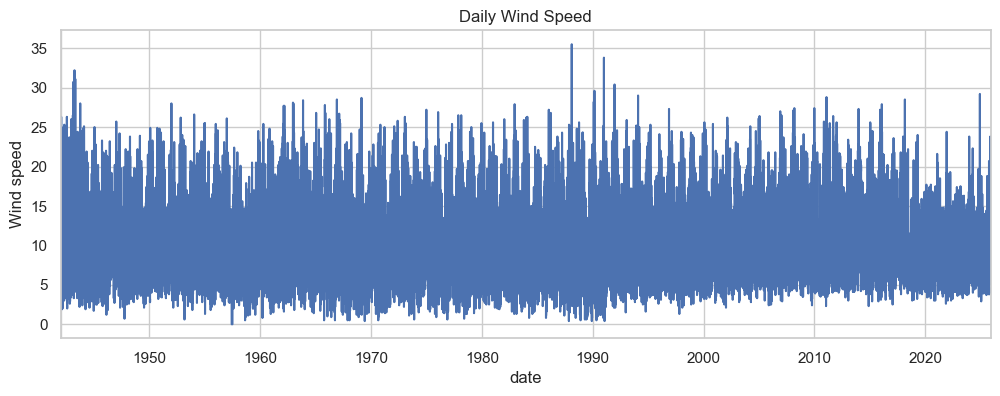

In [572]:
# plot wind speed ('wdsp' column)
df['wdsp'].plot(figsize=(12,4), title="Daily Wind Speed")
plt.ylabel('Wind speed')
plt.show()


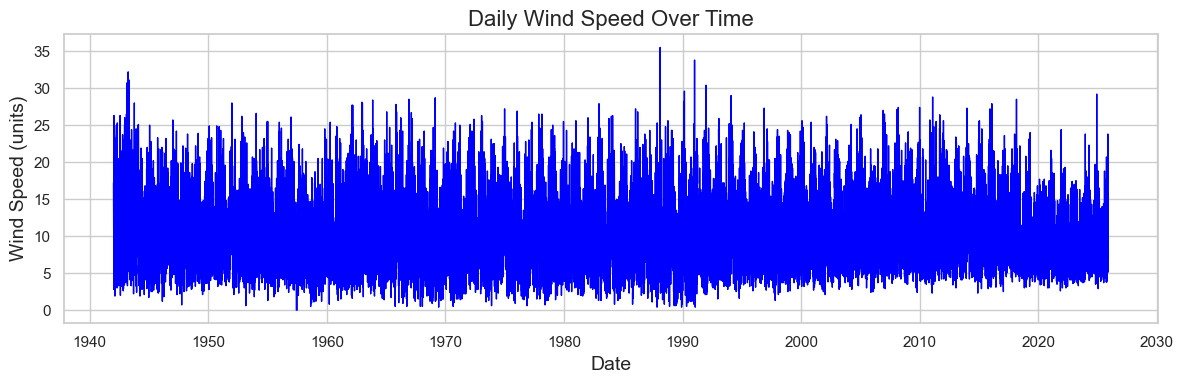

In [573]:
# lets try make this prettier with some custimisation. 
plt.figure(figsize=(12,4))
plt.plot(df.index, df['wdsp'], color='blue', linewidth=1)  
plt.title("Daily Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Wind Speed (units)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

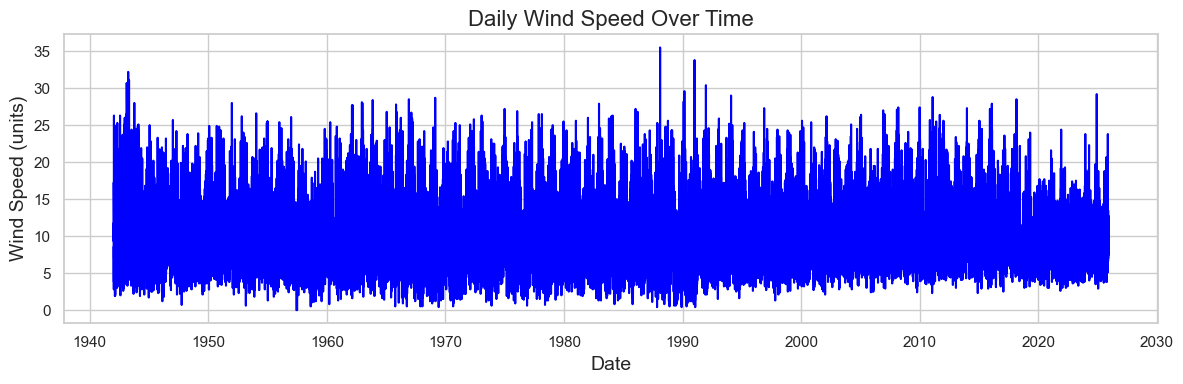

In [574]:
# ok lets look at using seaborn for better visualisation.
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
sns.lineplot(x=df.index, y='wdsp', data=df, color='blue')
plt.title("Daily Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Wind Speed (units)", fontsize=14)
plt.tight_layout()
plt.show()

not much difference with seaborn and plt but can play around some more.

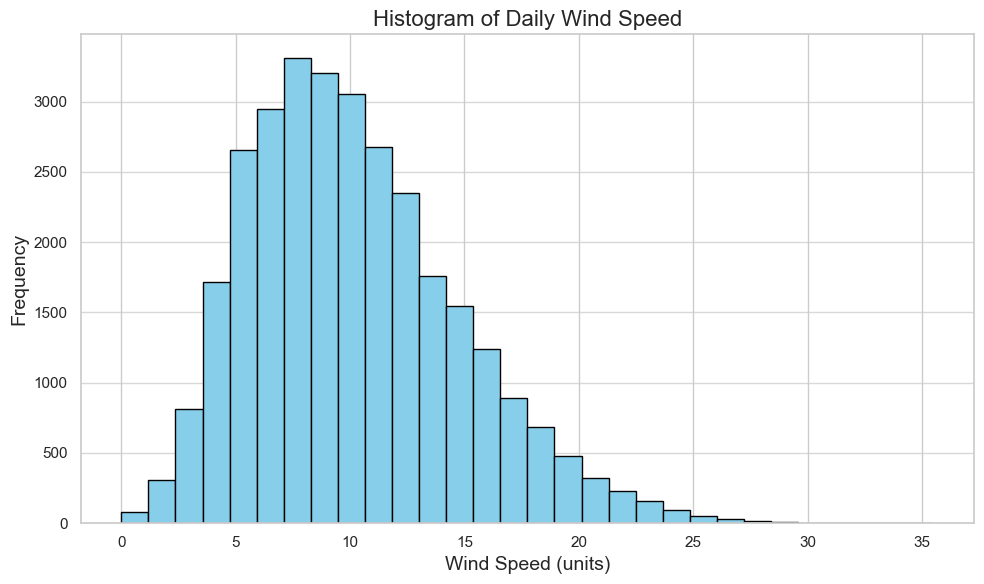

In [575]:
# ok lets try a histogram now.
plt.figure(figsize=(10,6)) 
plt.hist(df['wdsp'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Daily Wind Speed", fontsize=16)
plt.xlabel("Wind Speed (units)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

not sure a histogram will be best graph her for insights. Come back to this

In [576]:
# ok lets look at some stats now.
df['wdsp'].describe()  

count    30650.000000
mean        10.171263
std          4.585331
min          0.000000
25%          6.800000
50%          9.500000
75%         13.000000
max         35.500000
Name: wdsp, dtype: float64

Plot the daily mean of the data set.

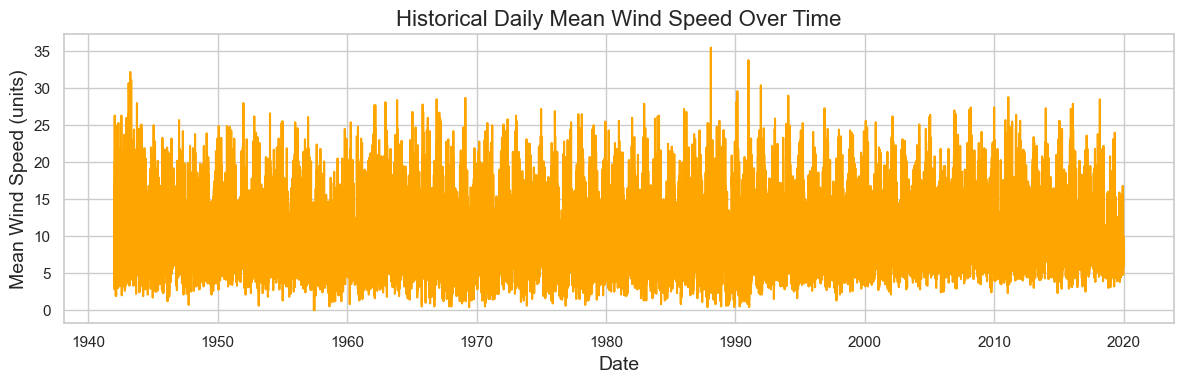

In [577]:
# plot daily mean of only historical data, no projections
historical_df = df[df.index < '2020-01-01']
plt.figure(figsize=(12,4)) 
sns.lineplot(x=historical_df.index, y='wdsp', data=historical_df, color='orange')
plt.title("Historical Daily Mean Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Mean Wind Speed (units)", fontsize=14)
plt.tight_layout()
plt.show()

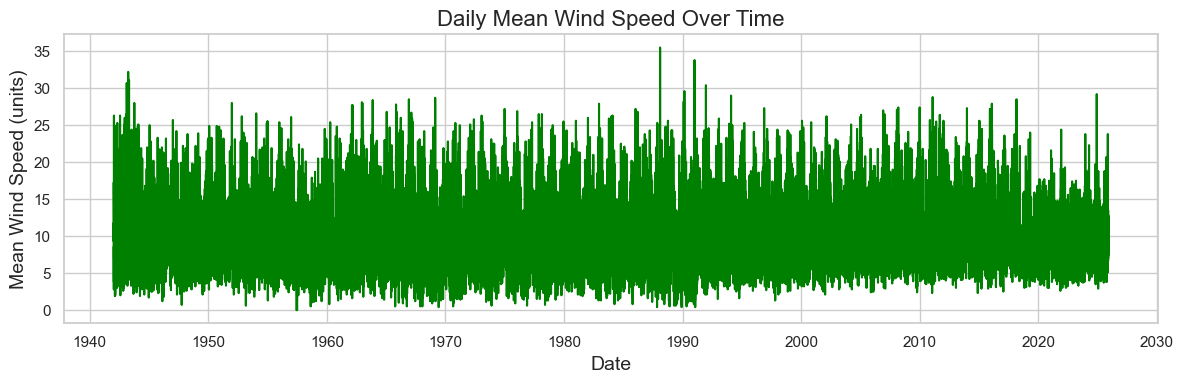

In [578]:
# plot the daily mean wind speed over time using seaborn
plt.figure(figsize=(12,4))
sns.lineplot(x=df.index, y='wdsp', data=df, color='green')
plt.title("Daily Mean Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Mean Wind Speed (units)", fontsize=14)
plt.tight_layout()
plt.show()

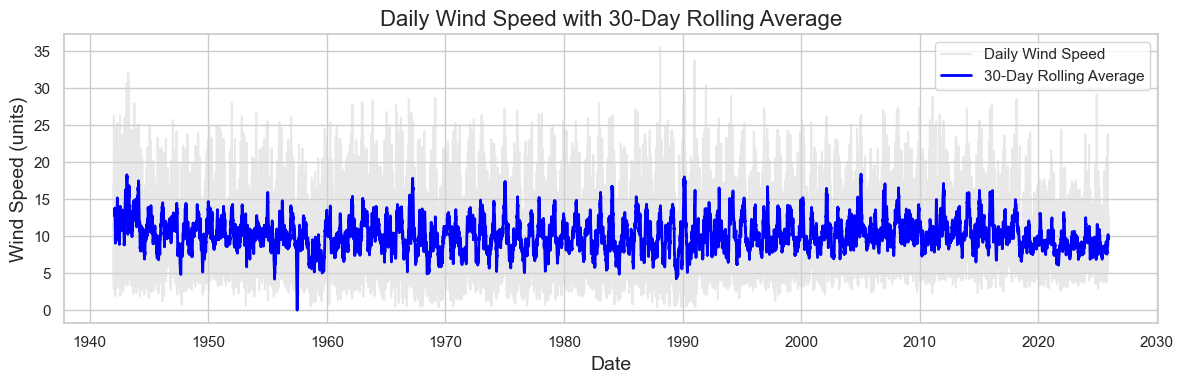

In [579]:
# time to plot some rolling averages.
rolling_window = 30  # 30-day rolling average
df['wdsp_rolling'] = df['wdsp'].rolling(window=rolling_window).mean()  
plt.figure(figsize=(12,4))
plt.plot(df.index, df['wdsp'], color='lightgray', alpha=0.5, label='Daily Wind Speed')
plt.plot(df.index, df['wdsp_rolling'], color='blue', linewidth=2, label='30-Day Rolling Average')
plt.title("Daily Wind Speed with 30-Day Rolling Average", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Wind Speed (units)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [580]:
# plot the high wind speed days looking at the max wind speed

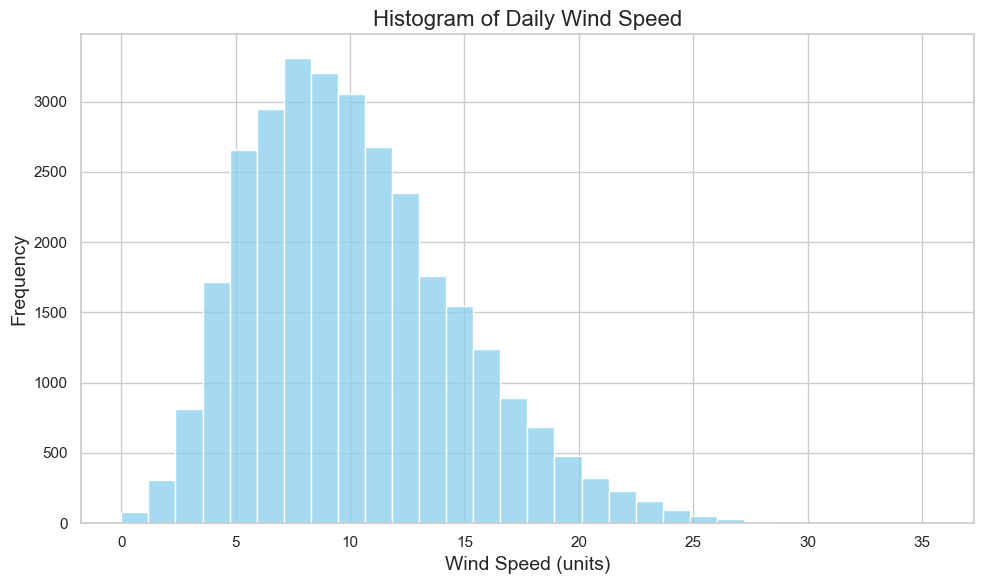

In [581]:
# plot histogram of wind speed with seaborn
plt.figure(figsize=(10,6))
sns.histplot(df['wdsp'].dropna(), bins=30, color='skyblue', kde=False)
plt.title("Histogram of Daily Wind Speed", fontsize=16)
plt.xlabel("Wind Speed (units)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

In [582]:
# look at filtering data for high wind speeds
high_wind_threshold = 20  # define high wind speed threshold
high_wind_days = df[df['wdsp'] > high_wind_threshold]
high_wind_days
high_wind_days.describe()


,wdsp,rain,7d_avg,30d_avg,wdsp_rolling
count,950.000000,950.000000,950.000000,947.000000,947.000000
mean,22.387579,3.880632,14.552105,12.322429,12.322429
std,2.107719,5.847455,2.963495,2.221361,2.221361
min,20.100000,0.000000,5.914286,5.766667,5.766667
25%,20.800000,0.500000,12.271429,10.753333,10.753333
50%,21.800000,2.100000,14.628571,12.256667,12.256667
75%,23.400000,4.700000,16.682143,13.823333,13.823333
max,35.500000,60.200000,24.714286,18.393333,18.393333


# END of Draft 1 

# Start of Draft 2 layout

What kind of analysis we doing?????

1  Basic Analysis - stuff from last year 

Summary statistics: mean, median, min, max, standard deviation of wind speeds. Etc etc et c 

Distribution plots:

Histogram to see the distribution of wind speeds.

Density plot (KDE) for a smoother view.

Boxplots: Identify outliers or unusual wind speed events.

Frequency of strong winds: Count number of times wind exceeds thresholds (e.g., 20 mph).

2  Time Analysis so rolling averages maybe?

Time series plot: Plot wind speed over time to see trends.

Rolling averages / smoothing:

Daily, weekly, or hourly rolling averages to smooth short-term fluctuations.

Rolling standard deviation can indicate periods of high variability.

Seasonal decomposition: Identify trends, seasonality, and residuals we have long term data starting 1980?? Maybe double check

Peak analysis: Identify maximum wind events per day, week, or month. This would be good for airport to plan flights

3 Pattern Analysis

Diurnal patterns: How wind speed varies over hours of the day. ??? Maybe 

Seasonal patterns: Compare wind speeds across months or seasons. Extra if there is time 


4  Correlation and External Factors - this will be extra if there is time

Compare wind speed with other variables if available:

Temperature, pressure, humidity....

Weather events (storms, fronts). - could be useful??

Correlation plots (scatter plots, heatmaps).

5  Predictive/Forecasting Approaches - 

Time series forecasting:

ARIMA, SARIMA, Prophet for trend and seasonality.

Rolling-window predictions for short-term forecasts.

Extreme wind events prediction: Use thresholds to forecast probability of strong wind events.

6. Advanced Visualizations - i like sound of heatmaps but unsure of wind rose charts will see how they look

Wind rose charts: Direction and speed distribution.

Heatmaps: Wind speed by time of day vs. month/season.


Rolling averages are great to reveal longer-term trends, but you can also calculate rolling maximums to highlight peak wind events, which are critical for airports.